# Spatial Join
Spatial join is yet another classic GIS problem: getting attributes from one layer and transferring them into another layer based on their spatial relationship. For example, 
We could join the attributes of a polygon layer into a point layer where each point would get the attributes of a polygon that contains the point. Luckily, spatial join (gpd.sjoin() -function) is already implemented in Geopandas.

In [1]:
# Necessary imports
import geopandas as gpd
from fiona.crs import from_epsg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data containing population figures for 2015
# ASUKKAITA means population in Finnish
pop = gpd.read_file("Data/Vaestotietoruudukko_2015.shp")
pop.head()

,INDEX,ASUKKAITA,ASVALJYYS,IKA0_9,IKA10_19,IKA20_29,IKA30_39,IKA40_49,IKA50_59,IKA60_69,IKA70_79,IKA_YLI80,geometry
0,688,8,31.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.99532626 6689749.005069185,..."
1,703,6,42.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.99532626 6685998.998064222,..."
2,710,8,44.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.99532626 6684249.004130407,..."
3,711,7,64.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.99532626 6683999.004997005,..."
4,715,19,23.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.99532626 6682998.998461431,..."


In [3]:
# Rename column and cull unnecessary columns
pop = pop.rename(columns={'ASUKKAITA': 'pop15'})
pop= pop[['pop15', 'geometry']]
pop.tail(2)

,pop15,geometry
5782,9,"POLYGON ((25513499.99632164 6685498.999797418,..."
5783,30244,"POLYGON ((25513999.999929 6659998.998172711, 2..."


In [4]:
# Read the address shapefile containing the geo-located coordinates (previous tutorial)
addresses = gpd.read_file("Data/addresses.shp")
addresses.head()

,address,id,addr,geometry
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.9155624 60.1632015)
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.9316914 60.1690222)
2,"Citycenter, 8, Kaivokatu, Keskusta, Kluuvi, Et...",1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.94244049213 60.16988445)
3,"1, Hermannin rantatie, Hermanninmäki, Hermanni...",1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (24.9654618 60.2009041)
4,"Hesburger Jätkäsaari, 9, Tyynenmerenkatu, Jätk...",1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (24.9216003 60.1566475)


In [5]:
# Are CRS identical?
print(pop.crs, addresses.crs)

{'lat_0': 0, 'k': 1, 'no_defs': True, 'lon_0': 25, 'units': 'm', 'y_0': 0, 'proj': 'tmerc', 'ellps': 'GRS80', 'x_0': 25500000} {'init': 'epsg:4326'}


In [6]:
# No, so lets re-project:
popProj = pop.copy()
popProj = popProj.to_crs(epsg=4326)
popProj.crs = from_epsg(4326)
popProj.head()
print(popProj.crs, addresses.crs)

{'init': 'epsg:4326', 'no_defs': True} {'init': 'epsg:4326'}


In [7]:
# Make a spatial join
join = gpd.sjoin(addresses, popProj, how="inner", op="within")
join.head()

,address,id,addr,geometry,index_right,pop15
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.9155624 60.1632015),3214,521
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.9316914 60.1690222),3326,173
2,"Citycenter, 8, Kaivokatu, Keskusta, Kluuvi, Et...",1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.94244049213 60.16988445),3449,31
10,"Rautatientori, Keskusta, Kluuvi, Eteläinen suu...",1011,"Rautatientori 1, 00100 Helsinki, Finland",POINT (24.9440942536239 60.17130125),3449,31
3,"1, Hermannin rantatie, Hermanninmäki, Hermanni...",1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (24.9654618 60.2009041),3684,139


In [8]:
# Save to an new file
outFile = r"Data/addresses_pop15_epsg3979.shp"
join.to_file(outFile)

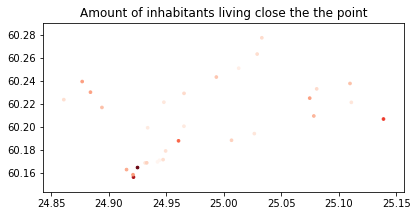

In [9]:
# Plot
join.plot(column='pop15', cmap="Reds", markersize=7, legend=False);
plt.title("Amount of inhabitants living close the the point");
plt.tight_layout()